# Zomato data analysis projects

# Step 1- Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Step 2 - Creat the data frame

In [2]:
df=pd.read_csv("Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# Convert the data type of column - rate

In [3]:
def handelrate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

df["rate"]=df["rate"].apply(handelrate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# What type of resturant do the mejority of customers order from?

In [5]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Here,the mejority of customers order from dining type of resturant. Second type of resturant is the Cafes type .Then,Buffet.Eventually,others. 

# How many votes has each type of resturant received from customers?

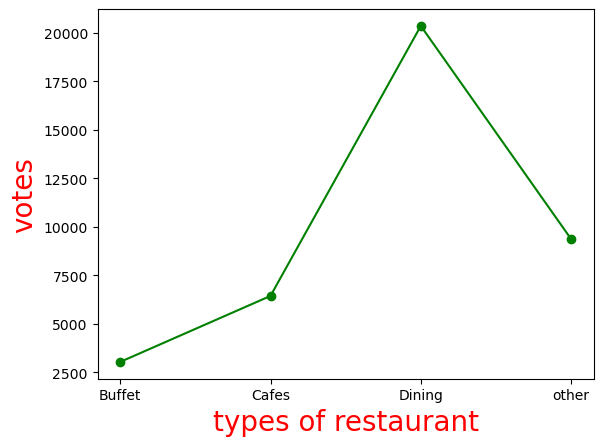

In [9]:


# Assuming df is already defined
group_data = df.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({'votes': group_data})

plt.plot(result, c="green", marker="o")
plt.xlabel("types of restaurant", color="red", fontsize=20)
plt.ylabel("votes", color="red", fontsize=20)
plt.show()


Here, Dining resturant has received maximum votes.

# What are the ratings that majority of customars have received?

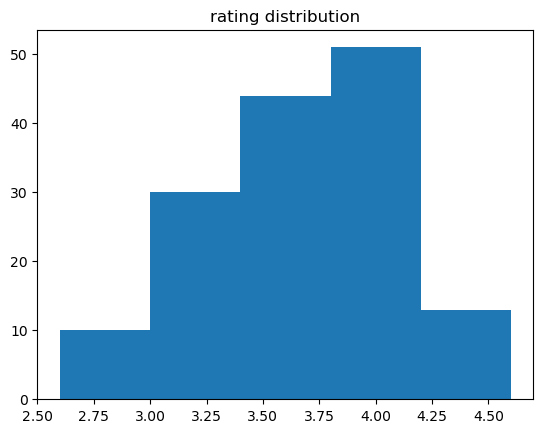

In [12]:
plt.hist(df["rate"],bins=5)
plt.title("rating distribution")
plt.show()

Conclusion- the mejority resturantes received rating from 3.5 to 4

# Zomato has observed that most couples  order their most of their from online.What is the average spending on each order?

In [13]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<AxesSubplot: xlabel='approx_cost(for two people)', ylabel='count'>

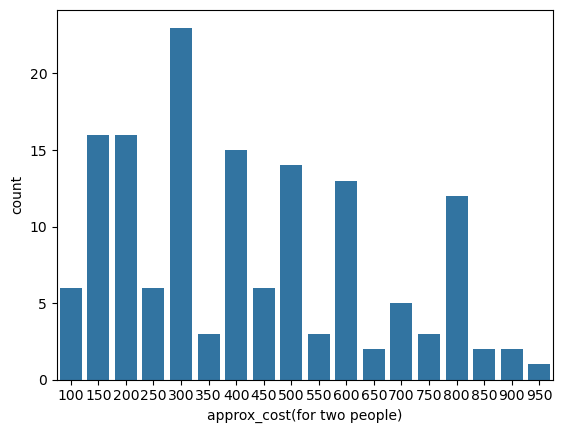

In [14]:
couple_data=df["approx_cost(for two people)"]
sn.countplot(x=couple_data)

conclusion - the mejorit of couples prefer resturant with an approximate cost of 300 tk

# Which mode(online or offline) has received the maximum rating?

In [15]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<AxesSubplot: xlabel='online_order', ylabel='rate'>

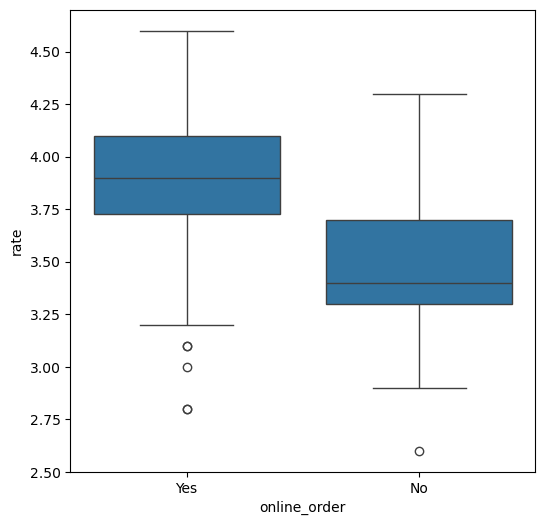

In [17]:
plt.figure(figsize=(6,6))
sn.boxplot(x="online_order", y="rate",data=df)

# conclusion - offline order receives lower rating in comparison to online order

# Which type of resturant received more offline orders, so that zomato can propose customers  with some good offers?

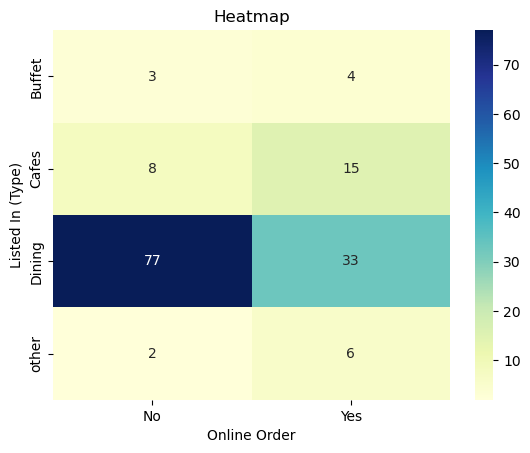

In [19]:

pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sn.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()


Conclusion -Dining resturant primarly accept offline orders, whereas Cafes primarly accept online orders.This suggests that clients prefer orders in person in resrurants, but prefer online orderin at cafes. 